In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_csv("creditcard.csv")

In [21]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [22]:
df['Class'].unique()

array([ 0.,  1., nan])

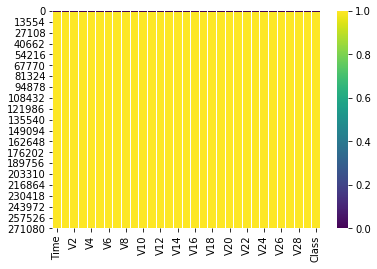

In [23]:
sns.heatmap(df.isnull(),cmap="viridis")

In [0]:
df.dropna(inplace=True)

In [25]:
df.keys()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [0]:
X = df.drop('Class',axis=1)
y = df['Class']

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [0]:
Decision = DecisionTreeClassifier()

In [30]:
Decision.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
predict = Decision.predict(X_test)

In [33]:
accuracy_score(y_test,predict)

0.9939393939393939

In [35]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       495
         1.0       0.00      0.00      0.00         0

    accuracy                           0.99       495
   macro avg       0.50      0.50      0.50       495
weighted avg       1.00      0.99      1.00       495



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [38]:
print(confusion_matrix(y_test,predict))

[[492   3]
 [  0   0]]


In [0]:
Feat = df.drop('Class',axis=1)
y = df['Class']

In [0]:
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(Feat)
y=df['Class']

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [57]:
model=XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
predict = model.predict(X_test)

In [59]:
accuracy_score(y_test,predict)

1.0

In [53]:
print(confusion_matrix(y_test,predict))

[[300]]


In [54]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       300

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
lr = LogisticRegression()

In [0]:
A = df.drop('Class',axis=1)
B = df['Class']

In [0]:
X_train,X_test,y_train,y_test=train_test_split(A,B)

In [67]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred = lr.predict(X_test)

In [70]:
accuracy_score(y_test,pred)

0.9946666666666667

In [71]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       374
         1.0       0.00      0.00      0.00         1

    accuracy                           0.99       375
   macro avg       0.50      0.50      0.50       375
weighted avg       0.99      0.99      0.99       375



In [72]:
print(confusion_matrix(y_test,pred))

[[373   1]
 [  1   0]]


In [77]:
df['Class'].value_counts()

0.0    1497
1.0       2
Name: Class, dtype: int64